In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
delhivery_df = pd.read_csv("C:\\Users\\ASUS\\Scaler\\delhivery_data.csv")
delhivery_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


# BASIC MATRICSES

In [4]:
delhivery_df.shape

(144867, 24)

In [5]:
delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
delhivery_df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [7]:
delhivery_df.nunique(axis=0)


data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [8]:
delhivery_df[delhivery_df['trip_uuid']=='trip-153741093647649320'][['source_name','destination_name']]

,source_name,destination_name
0,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
1,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
2,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
3,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
4,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
5,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)
6,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)
7,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)
8,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)
9,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat)


In [9]:
delhivery_df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [10]:
# Dropping missing value rows from source_name and destination_name as the missing values are less than 0.5%

delhivery_df.dropna(axis =0, how="any", inplace = True)

In [11]:
delhivery_df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

# MANUPULATING DATA TYPE

In [22]:
#Converting time columns into pandas datetime
delhivery_df['od_start_time'] = pd.to_datetime(delhivery_df['od_start_time'])
delhivery_df['od_end_time'] = pd.to_datetime(delhivery_df['od_end_time'])
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,sgmt_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0


# CREATING NEW FEATURES

In [23]:
#cumulate the value of sagments column time
delhivery_df['sgmt_key'] = delhivery_df['trip_uuid'] + delhivery_df['source_center'] + delhivery_df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    delhivery_df[col + '_sum'] = delhivery_df.groupby('sgmt_key')[col].cumsum()
    
delhivery_df[[col + '_sum' for col in segment_cols]]

create_segment_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
    
}

sgment = delhivery_df.groupby('sgmt_key').agg(create_segment_dict).reset_index()
sgment = sgment.sort_values(by=['sgmt_key','od_end_time'], ascending=True).reset_index()

sgment.head()


,index,sgmt_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


In [25]:
# Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

sgment['od_time_diff_hour'] = (sgment['od_end_time'] - sgment['od_start_time']).dt.total_seconds() /(60)
sgment

sgment[['start_scan_to_end_scan','od_time_diff_hour']].head()


,start_scan_to_end_scan,od_time_diff_hour
0,1260.0,1260.604421
1,999.0,999.505379
2,58.0,58.832388
3,122.0,122.779486
4,834.0,834.638929


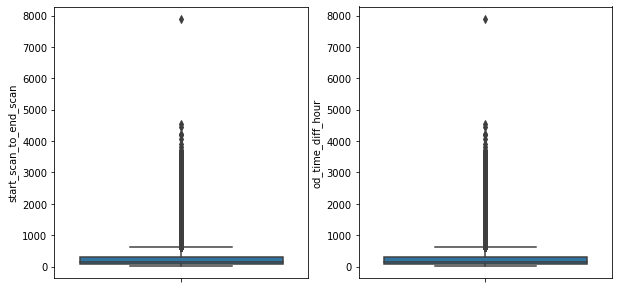

In [26]:
# Compare the difference between  od_time_diff_hour(od_start_time and od_end_time)and start_scan_to_end_scan  BY hypothesis testing/ Visual analysis to check. """

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=sgment,y=sgment["start_scan_to_end_scan"])
plt.subplot(1,2,2)
sns.boxplot(data=sgment,y=sgment["od_time_diff_hour"])
plt.show()


# looks like both of them has same median to confirm it let do the T test

 H0 :there is no diffrence in the mean ie od_time_diff_hour = start_scan_to_end_scan'
 Ha : there is diffrence in the mean ie mean of od_time_diff_hour > mean of start_scan_to_end_scan'
 significance (alpha) :0.05

In [27]:
from scipy.stats import ttest_ind
stats,p_value=ttest_ind(sgment['start_scan_to_end_scan'],sgment['od_time_diff_hour'])#,alternative="less")
print("t value :",stats)
if p_value>0.05:
  print("fail to reject the null hypothisis ie no diffrence in mean od_time_diff_hour = start_scan_to_end_scan'")
else:
  print("reject the null hypothisis ie  there is diffrence in the mean ie mean of od_time_diff_hour > mean of start_scan_to_end_scan")


t value : -0.12947099971100354
fail to reject the null hypothisis ie no diffrence in mean od_time_diff_hour = start_scan_to_end_scan'


# BIVARIATE ANALYSIS OF SAGMENT

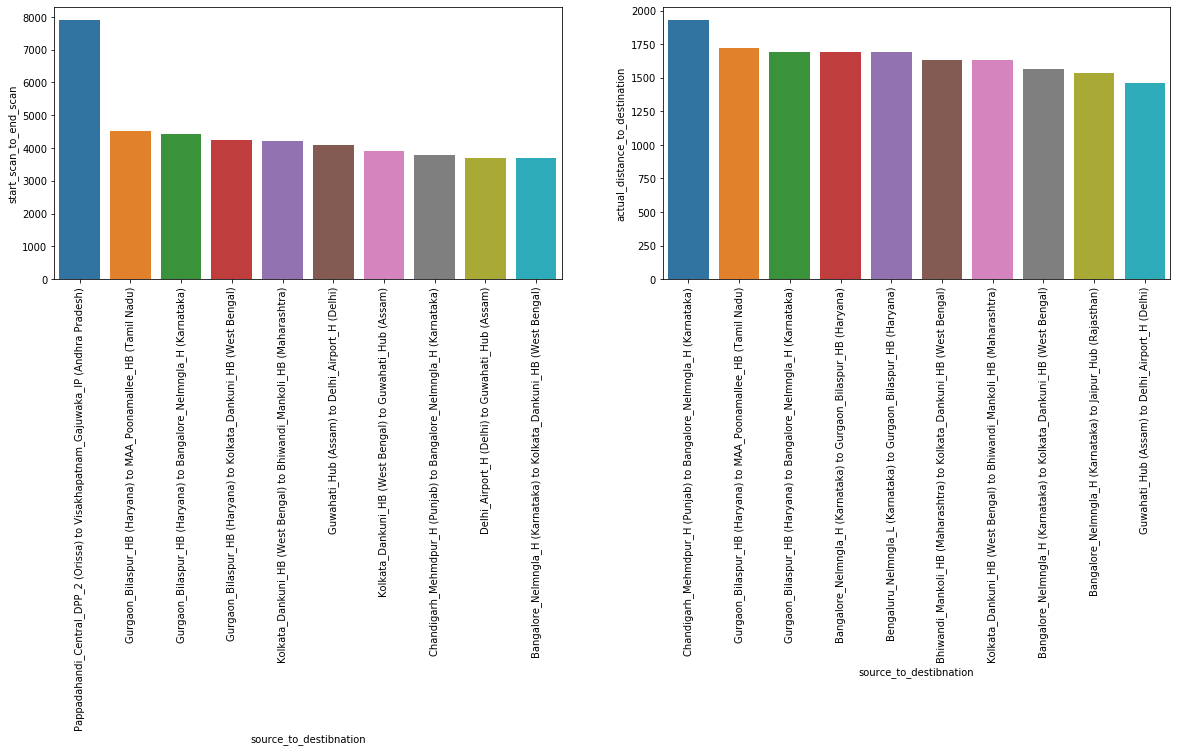

In [28]:
segment_city_city=sgment.copy()
segment_city_city['source_to_destibnation']=segment_city_city['source_name']+" to "+segment_city_city['destination_name']
segment_city_city_=segment_city_city[['source_to_destibnation','start_scan_to_end_scan','actual_distance_to_destination']].sort_values(by='start_scan_to_end_scan',ascending=False).reset_index().drop(['index'],axis=1).head(10)
segment_city_city__=segment_city_city[['source_to_destibnation','start_scan_to_end_scan','actual_distance_to_destination']].sort_values(by='actual_distance_to_destination',ascending=False).reset_index().drop(['index'],axis=1).drop_duplicates(subset="source_to_destibnation",keep="first").head(10)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=segment_city_city_,x='source_to_destibnation',y="start_scan_to_end_scan")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=segment_city_city__,x='source_to_destibnation',y="actual_distance_to_destination")
plt.xticks(rotation=90)
plt.show()

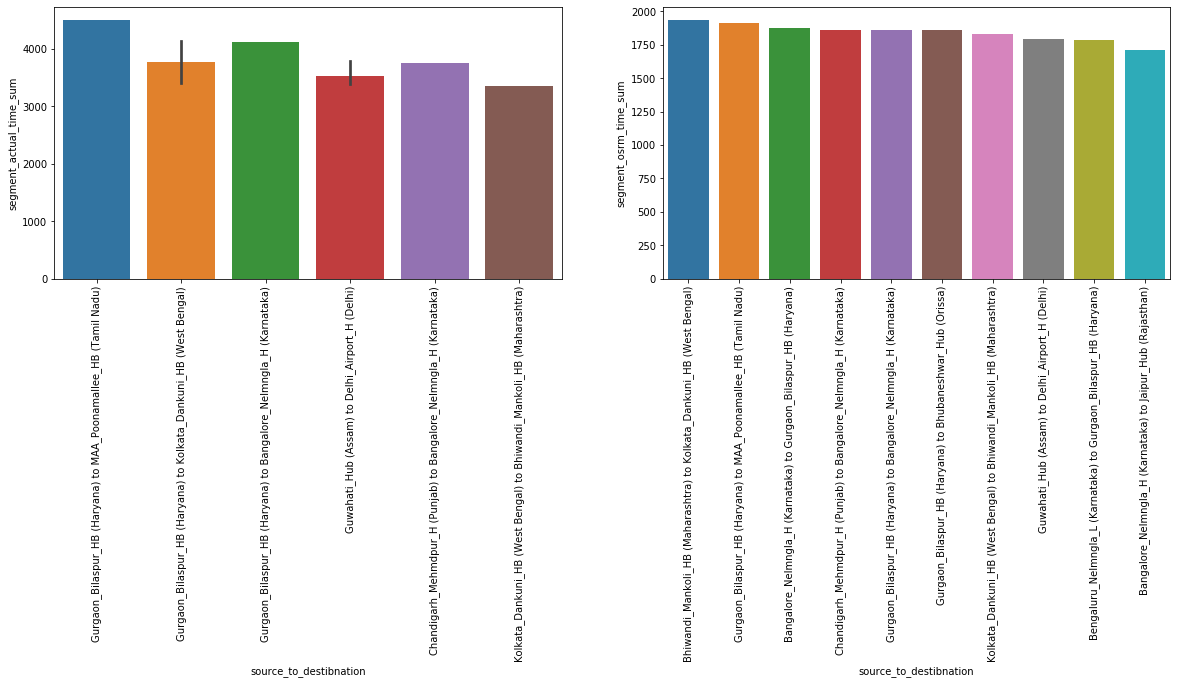

In [30]:
segment_city_city=sgment.copy()
segment_city_city['source_to_destibnation']=segment_city_city['source_name']+" to "+segment_city_city['destination_name']
segment_city_city_=segment_city_city[['source_to_destibnation','segment_actual_time_sum','segment_osrm_time_sum']].sort_values(by='segment_actual_time_sum',ascending=False).reset_index().drop(['index'],axis=1).head(10)
segment_city_city__=segment_city_city[['source_to_destibnation','segment_actual_time_sum','segment_osrm_time_sum']].sort_values(by='segment_osrm_time_sum',ascending=False).reset_index().drop(['index'],axis=1).drop_duplicates(subset="source_to_destibnation",keep="first").head(10)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=segment_city_city_,x='source_to_destibnation',y="segment_actual_time_sum")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=segment_city_city__,x='source_to_destibnation',y="segment_osrm_time_sum")
plt.xticks(rotation=90)
plt.show()


Gurgaon_Bilaspur_HB (Haryana) to MAA_Poonamallee_HB (Tamil Nadu,Gurgaon_Bilaspur_HB (Haryana) to Kolkata_Dankuni_HB (West Bengal),
Gurgaon_Bilaspur_HB (Haryana) to Bangalore_Nelmngla_H ARE THE SAGMENTS WHERE ACTUAL TIME CONSUME IS MORE BUT ORSM SYSTEM SHOWS 	Chandigarh_Mehmdpur_H (Punjab) to Bangalore_Nelmngla_H (Karnataka),	
Kolkata_Dankuni_HB (West Bengal) to Bhiwandi_Mankoli_HB (Maharashtra),	Guwahati_Hub (Assam) to Delhi_Airport_H (Delhi) ARE THE SAGMENT WHERE THE TIME CONSUME IS MORE


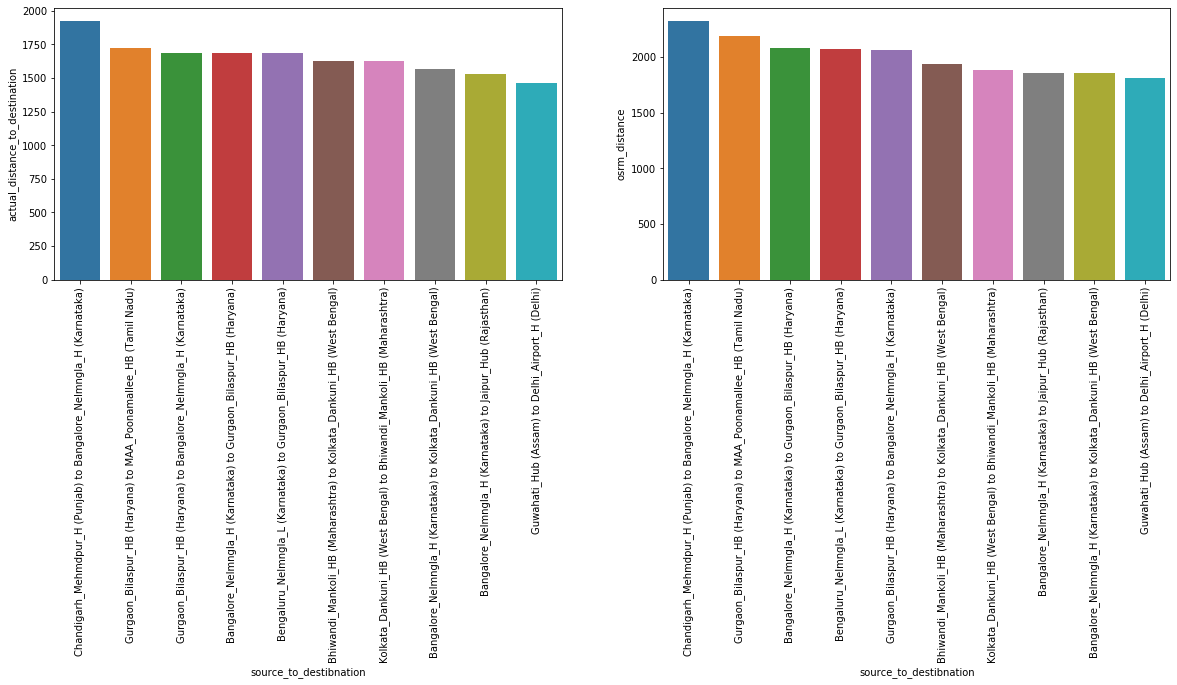

In [31]:
segment_city_city=sgment.copy()
segment_city_city['source_to_destibnation']=segment_city_city['source_name']+" to "+segment_city_city['destination_name']
segment_city_city_=segment_city_city[['source_to_destibnation','actual_distance_to_destination','osrm_distance']].sort_values(by='actual_distance_to_destination',ascending=False).reset_index().drop(['index'],axis=1)
segment_city_city_=segment_city_city.groupby('source_to_destibnation')['actual_distance_to_destination'].mean().to_frame().sort_values(by='actual_distance_to_destination',ascending=False).reset_index().head(10)
segment_city_city__=segment_city_city[['source_to_destibnation','segment_actual_time_sum','osrm_distance']].sort_values(by='osrm_distance',ascending=False).reset_index().drop(['index'],axis=1).drop_duplicates(subset="source_to_destibnation",keep="first").head(10)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=segment_city_city_,x='source_to_destibnation',y="actual_distance_to_destination")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=segment_city_city__,x='source_to_destibnation',y="osrm_distance")
plt.xticks(rotation=90)
plt.show()

Chandigarh_Mehmdpur_H (Punjab) to Bangalore_Nelmngla_H (Karnataka),	Gurgaon_Bilaspur_HB (Haryana) to MAA_Poonamallee_HB (Tamil Nadu),
Gurgaon_Bilaspur_HB (Haryana) to Bangalore_Nelmngla_H (Karnataka) ARE THE SAGMENT WHERE THE DISTANCE IS MAXIMUM BUT THE ORSM SYSTEM SHOWS Chandigarh_Mehmdpur_H (Punjab) to Bangalore_Nelmngla_H (Karnataka),
Gurgaon_Bilaspur_HB (Haryana) to MAA_Poonamallee_HB (Tamil Nadu),
Bangalore_Nelmngla_H (Karnataka) to Gurgaon_Bilaspur_HB (Haryana) ARE THE SAGMENT WHERE THE DISTANCES ARE MAXIMUM


# CREATING TRIPS AND ANALYS THE DATA


In [32]:
create_trip_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum', 
    
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    
}

trip = sgment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)
trip

trip[['actual_time', 'segment_actual_time_sum']].head()


,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0


# Build some features to prepare the data for actual analysis Extract features from the below fields:
 Destination Name: Split and extract features out of destination. City-place-code (State)
 Source Name: Split and extract features out of destination. City-place-code (State)
 Trip_creation_time: Extract features like month, year and day etc

In [33]:
import re
trip['destination_name'] = trip['destination_name'].str.lower() # lowering all columns
trip['source_name'] = trip['source_name']

def place2state(x):
    # transform "gurgaon_bilaspur_hb (haryana)" into "haryana"
    state = x.split('(')[1]
    
    return state[:-1] #removing ')' from ending

def place2city(x):
    #we will remove state
    city = x.split(' (')[0]
    
    city = city.split('_')[0]
    
    # Now daling with edge cases
          
    if city == 'pnq vadgaon sheri dpc': return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' :
        return 'bengaluru'
    if city == 'bhopal mp nagar':
        return 'bhopal'
    if city == 'mumbai antop hill':
        return 'mumbai'

    return city

def place2city_place(x):

    # we will remove state
    x = x.split('(')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]

    # now we need to deal with edge cases or imporper name convention

    # if len(x.split('_')) == 2:

    return x.split(' ')[0]
    
def place2code(x):
    # we will remove state
    x = x.split('(')[0]

    if len(x.split('_')) >= 3:
        return x.split('_')[-1]

    return 'none'

trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

trip[['destination_state','destination_city','destination_place','destination_code']]

trip['trip_creation_time'] = pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.week  #isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

trip[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,uttar pradesh,kanpur,central,6,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,haryana,gurgaon,bilaspur,hb,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,wrdn1dpp,d,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,punjab,chandigarh,mehmdpur,h,2018,10,23,3,40,2
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,haryana,faridabad,blbgarh,dc,2018,10,23,3,40,2
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,uttar pradesh,kanpur,govndngr,dc,2018,10,23,3,40,2
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,tamil nadu,tirchchndr,shnmgprm,d,2018,10,23,3,40,2


# Handle the outliers

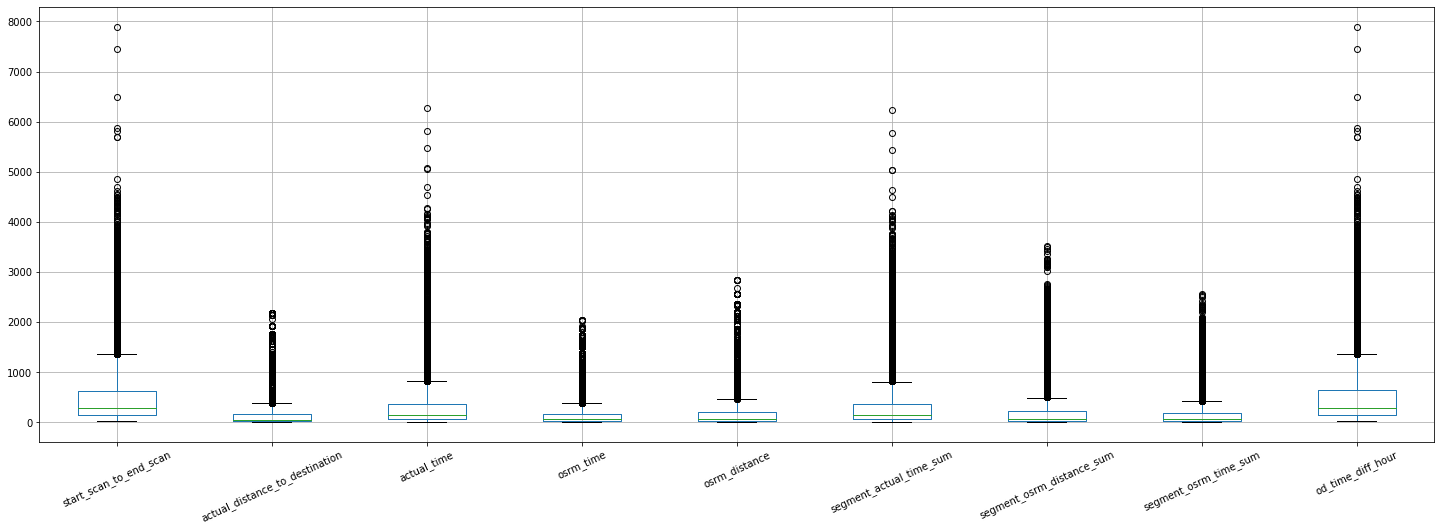

In [34]:
# Find outliers in numericals variable"""

num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_time_diff_hour']

trip[num_cols].boxplot(rot=25, figsize=(25,8))


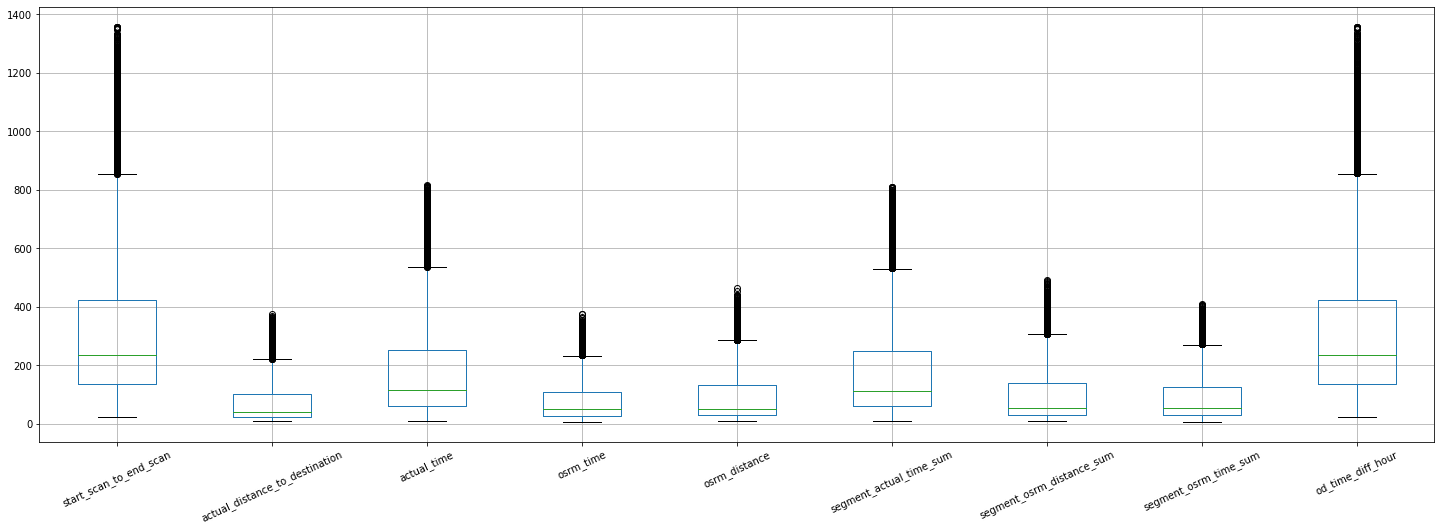

In [35]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1
trip = trip[-((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

trip

trip[num_cols].boxplot(rot=25, figsize=(25,8))


# HYPOTHISIS TESTING

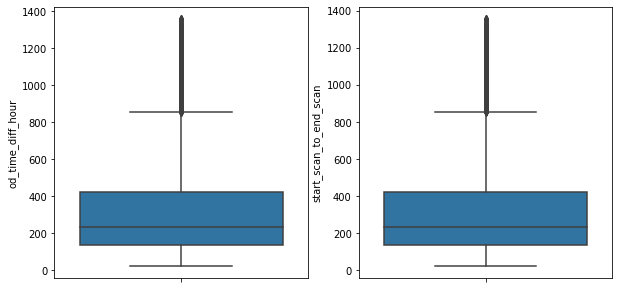

In [36]:
# Compare the difference between od_time_diff_hour(od_start_time and od_end_time)and start_scan_to_end_scan BY hypothesis testing/ Visual analysis to check

trip[['od_time_diff_hour','start_scan_to_end_scan']]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=trip,y=trip["od_time_diff_hour"])
plt.subplot(1,2,2)
sns.boxplot(data=trip,y=trip["start_scan_to_end_scan"])
plt.show()

In [37]:
from scipy.stats import ttest_ind
stats,p_value=ttest_ind(trip["od_time_diff_hour"],trip["start_scan_to_end_scan"])
print("t value :",stats)
if p_value>0.05:
  print("fail to reject the null hypothisis ie  od_time_diff_hour =start_scan_to_end_scan")
else:
  print("reject the null hypothisis ie  there is diffrence in the mean ie  od_time_diff_hour!= start_scan_to_end_scan")

# looks like actual time has higher median value then osrm time to confirm the statement let do T test
# H0 : means are same ie mean of od_time_diff_hour = start_scan_to_end_scan
# Ha : means are not same ie od_time_diff_hour != start_scan_to_end_scan
# significance(alpha)=0.05

t value : 0.26323309914294246
fail to reject the null hypothisis ie  od_time_diff_hour =start_scan_to_end_scan


# Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

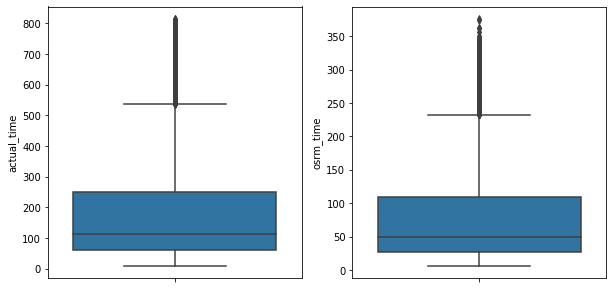

In [38]:
trip[['actual_time','osrm_time']]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=trip,y=trip["actual_time"])
plt.subplot(1,2,2)
sns.boxplot(data=trip,y=trip["osrm_time"])
plt.show()

# looks like actual time has higher median value then osrm time to confirm the statement let do T test

# H0 : means are same ie mean of actual time = orsm time
# Ha : means are not same ie actual time != orsm time
# significance(alpha)=0.05

In [39]:
from scipy.stats import ttest_ind
stats,p_value=ttest_ind(trip["actual_time"],trip["osrm_time"])
print("t value :",stats)
if p_value>0.05:
  print("fail to reject the null hypothisis ie  actual time = orsm time")
else:
  print("reject the null hypothisis ie  there is diffrence in the mean ie  actual time != orsm time")

t value : 64.2193495364768
reject the null hypothisis ie  there is diffrence in the mean ie  actual time != orsm time


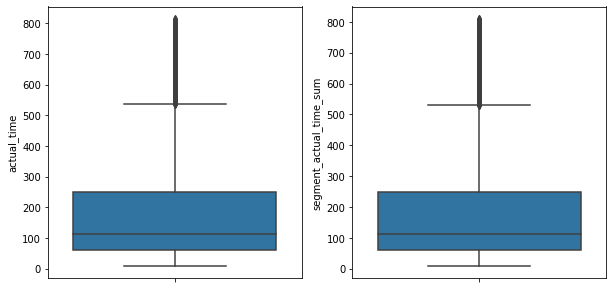

In [40]:
# Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)"""

trip[['actual_time','segment_actual_time_sum']]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=trip,y=trip["actual_time"])
plt.subplot(1,2,2)
sns.boxplot(data=trip,y=trip["segment_actual_time_sum"])
plt.show()

In [41]:
# looks like the median for actual time and segment_actual_time aggregated value is same to confirm the statement let do T test

# H0 : means are same ie mean of actual time = segment_actual_time aggregated value
# Ha : means are not same ie actual time != segment_actual_time aggregated value
# significance(alpha)=0.05

from scipy.stats import ttest_ind
stats,p_value=ttest_ind(trip["actual_time"],trip["segment_actual_time_sum"])
print("t value :",stats)
if p_value>0.05:
  print("fail to reject the null hypothisis ie  actual time = segment_actual_time aggregated value")
else:
  print("reject the null hypothisis ie  there is diffrence in the mean ie  actual time != segment_actual_time_aggregated value")


t value : 0.8381648951065267
fail to reject the null hypothisis ie  actual time = segment_actual_time aggregated value


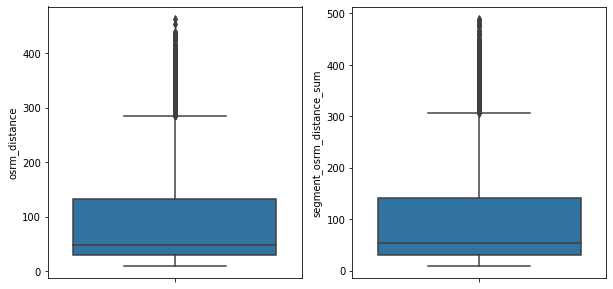

In [42]:
# Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)"""

trip[['osrm_distance','segment_osrm_distance_sum']]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=trip,y=trip["osrm_distance"])
plt.subplot(1,2,2)
sns.boxplot(data=trip,y=trip["segment_osrm_distance_sum"])
plt.show()

#UNIVARIATE ANALYSIS FOR THE TRIP

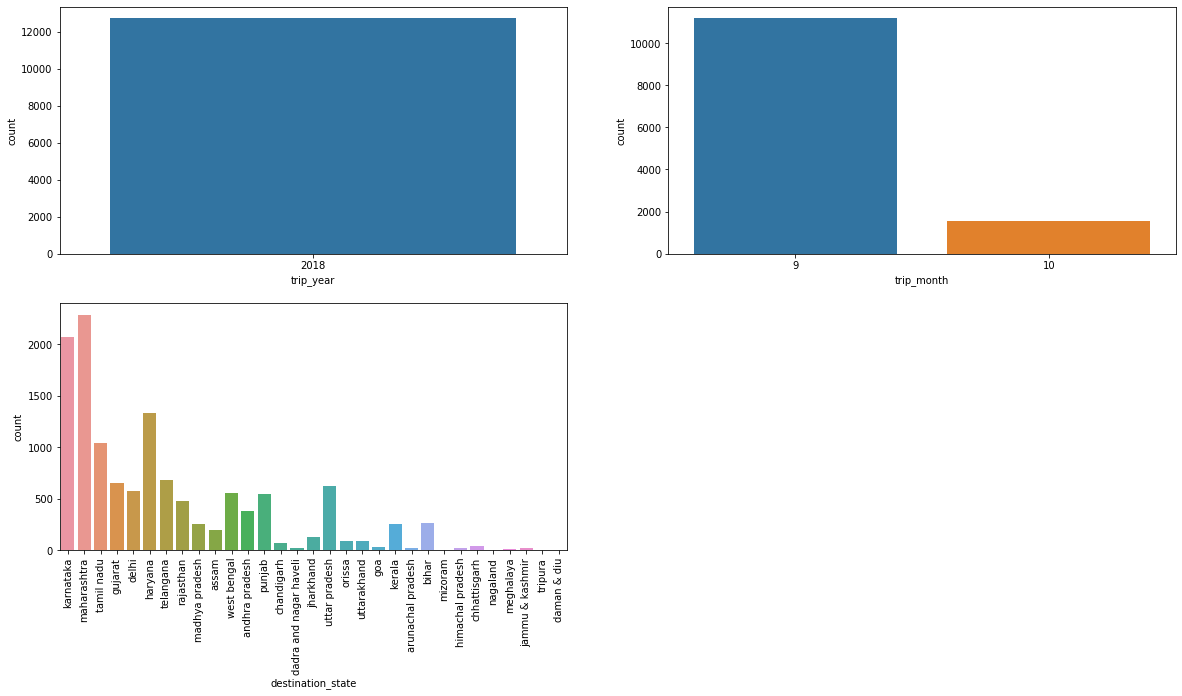

In [43]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plots=sns.countplot(x=trip["trip_year"])
plt.subplot(2,2,2)
plots=sns.countplot(x=trip["trip_month"])
plt.subplot(2,2,3)
plots=sns.countplot(x=trip['destination_state'])
plt.xticks(rotation=90)

plt.show()

THE INTERVEL FOR WHICH THE DATA IS GIVEN IS 2018 SEPTEMBER TO OCTOBER

FOR THE STATE OF MAHARASHTRA,KARNATAKA,HARIYANA MOST TRIPS ARE OCCURED

# BIVARIATE ANALYSIS

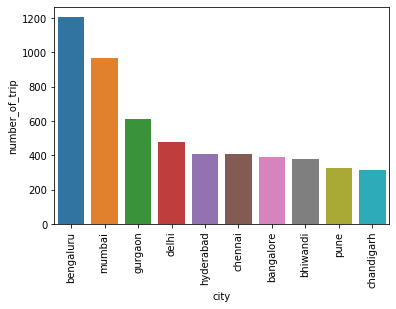

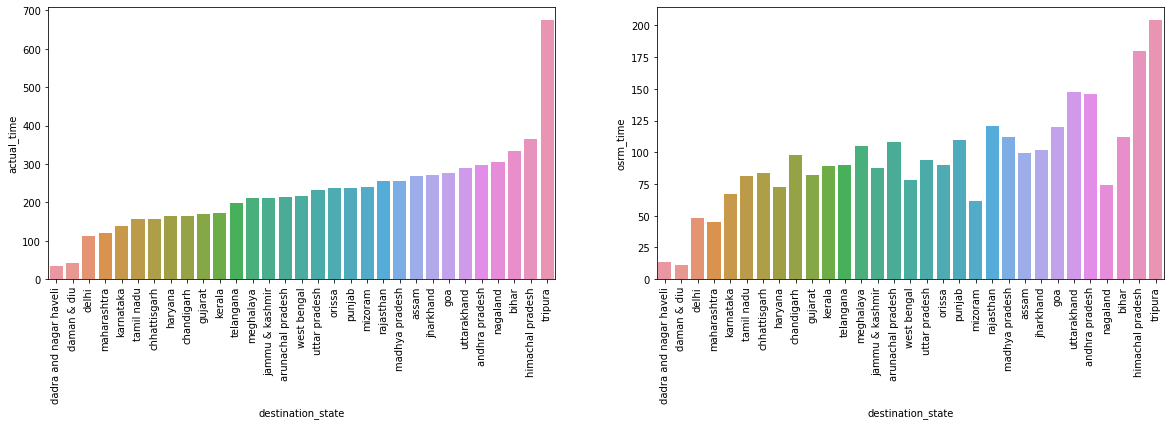

In [44]:
trip_top_10=trip['destination_city'].value_counts().to_frame().reset_index().rename(columns={"index":'city',"destination_city":'number_of_trip'}).head(10)

sns.barplot(x=trip_top_10["city"],y=trip_top_10["number_of_trip"])
plt.xticks(rotation=90)
plt.show()

"""FOR THE CITY BANGALURU,MUMBAI,GUARGAON MOST TRIP ARE OCCURED IE THERE ARE MORE NUMBERS OF ORDERS FROM THIS STATES"""

trip_mean_time=trip.groupby(['destination_state'])[['actual_time','osrm_time']].mean().reset_index().sort_values(by='actual_time').reset_index(drop="index")

col=["actual_time","osrm_time"]
k=1
plt.figure(figsize=(20,5))
for i in col:
  
  plt.subplot(1,2,k)
  sns.barplot(x=trip_mean_time["destination_state"],y=trip_mean_time[i])
  k+=1
  plt.xticks(rotation=90)
plt.show()

IN REALITY TRIPURA,HIMACHAL PRADESH,BIHAR TAKE MORE TIME FOR A TRIP
BUT THE ORSM SYSTEM SHOWS TRIPURA,HIMACHAL PRADESH,ANDHRA PRADESH TAKES MORE TIME

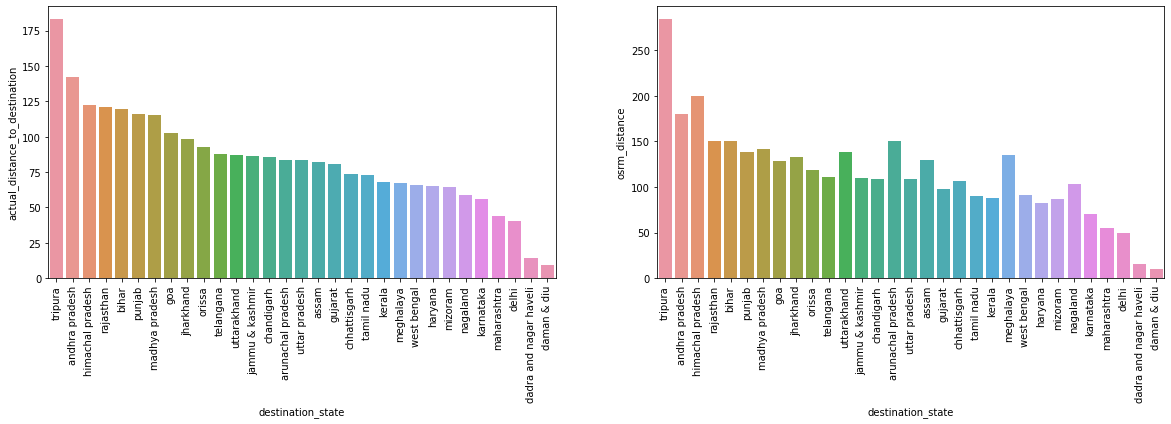

In [45]:
trip_mean_distance=trip.groupby(['destination_state'])[['actual_distance_to_destination','osrm_distance']].mean().reset_index().sort_values(by='actual_distance_to_destination',ascending=False).reset_index(drop="index")

col=["actual_distance_to_destination","osrm_distance"]
k=1
plt.figure(figsize=(20,5))
for i in col:
  
  plt.subplot(1,2,k)
  sns.barplot(x=trip_mean_distance["destination_state"],y=trip_mean_distance[i])
  k+=1
  plt.xticks(rotation=90)
plt.show()

IN REALITY TRIPURA,ANDHRA PRADESH,HIMACHAL PRADESH IS THE LONGEST ROUTE THE ORSM SYSTEM ALSO SHOWS  THE SAME

In [86]:
conda update seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ASUS\Anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.4|     pyhd3eb1b0_0           9 KB
    backports.tempfile-1.0     |     pyhd3eb1b0_1          11 KB
    future-0.18.3              |   py37haa95532_0         702 KB
    ------------------------------------------------------------
                                           Total:         722 KB

The following packages will be UPDATED:

  backports.functoo~                               1.5-py_2 --> 1.6.4-pyhd3eb1b0_0
  future                                      0.17.1-py37_0 --> 0.18.3-py37haa95532_0

The following packages will be DOWNGRADED:

  backports.tempfile                               1.0-py_1 --> 1.0-pyhd3eb1b0_1




backports.functools_ | 9 KB    

C:\Users\ASUS\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda




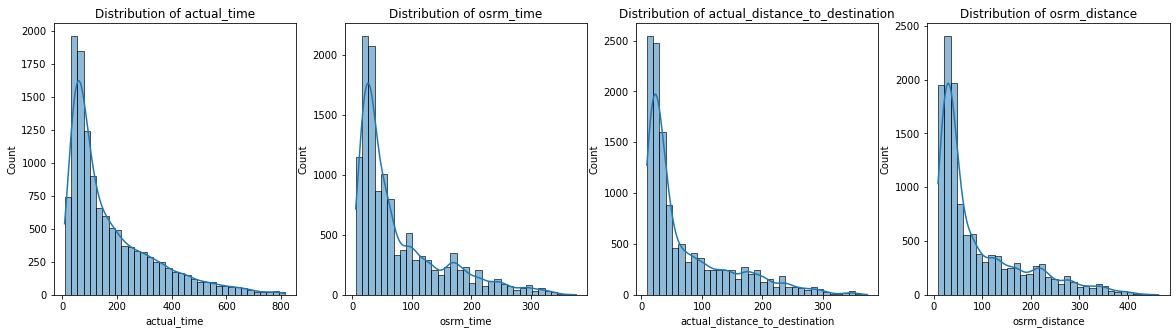

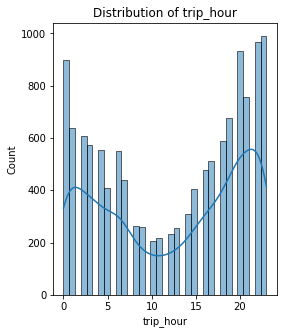

In [46]:
import seaborn as sns
col=["actual_time","osrm_time","actual_distance_to_destination","osrm_distance"]
k=1
fig=plt.figure(figsize=(20,5))
for i in col:
  plt.subplot(1,4,k)
  sns.histplot(data=trip,x=trip[i],bins=35,kde=True)
  plt.title('Distribution of'+" "+i)
  k+=1
plt.show()
plt.figure(figsize=(4,5))
sns.histplot(data=trip,x=trip["trip_hour"],bins=35,kde=True)
plt.title('Distribution of trip_hour')
plt.show()

# Handling Categorical Variables

In [47]:
trip['route_type'].value_counts()

"""# Only two route_type-Do one hot encoding"""

trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

# Normalize/Standarize the numerical features using MinMaxScaler or StandardScaler

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(trip[num_cols])

trip[num_cols] = scaler.transform(trip[num_cols])

trip[num_cols]

trip[num_cols].describe()


,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.808268e-17,-5.267735e-17,-6.830799e-17,7.396469e-17,5.696514e-17,-8.802900e-17,2.966223e-17,1.506301e-16,-1.496572e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-9.375981e-01,-1.003850e+00,-1.162915e+00
25%,-7.207269e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.228116e-01,-7.274750e-01,-7.210516e-01
50%,-3.411472e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.628077e-01,-4.134119e-01,-3.418602e-01
75%,4.023595e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.488499e-01,4.910897e-01,4.020802e-01
max,4.049455e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.130135e+00,4.046283e+00,4.050310e+00


# There is a significant difference between OSRM and actual parameters.